In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
SP500 = pd.read_csv('SP500.csv',parse_dates=['Date'],index_col='Date',usecols=['Date','Close'])
SP500

,Close
Date,
1970-12-31,92.150002
1971-01-04,91.150002
1971-01-05,91.800003
1971-01-06,92.349998
1971-01-07,92.379997
...,...
2018-12-21,2416.620117
2018-12-24,2351.100098
2018-12-26,2467.699951


In [16]:
SP500 = SP500.loc['1988-12-30':'2018-12-31'].copy()
SP500

,Close
Date,
1988-12-30,277.720001
1989-01-03,275.309998
1989-01-04,279.429993
1989-01-05,280.010010
1989-01-06,280.670013
...,...
2018-12-21,2416.620117
2018-12-24,2351.100098
2018-12-26,2467.699951


In [17]:
annual=SP500.resample('A',kind='period').last()

In [18]:
annual['Return']= np.log(annual.Close/annual.Close.shift())

In [23]:
annual.dropna(inplace=True)
annual

,Close,Return
Date,,
1989,353.399994,0.240987
1990,330.220001,-0.067841
1991,417.089996,0.233543
1992,435.709991,0.043675
1993,466.450012,0.068174
1994,459.269989,-0.015513
1995,615.929993,0.293495
1996,740.739990,0.184516
1997,970.429993,0.270090


In [24]:
year = annual.index.size
year

30

In [26]:
windows = [year for year in range(30,0,-1)]
windows

[30,
 29,
 28,
 27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17,
 16,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 1]

In [46]:
for year in windows:
    annual['{}Y'.format(year)]= np.exp(year * annual.Return.rolling(year).mean())*100

In [47]:
triangle= annual.drop(columns=['Close','Return'])

In [48]:
triangle

,30Y,29Y,28Y,27Y,26Y,25Y,24Y,23Y,22Y,21Y,...,10Y,9Y,8Y,7Y,6Y,5Y,4Y,3Y,2Y,1Y
Date,,,,,,,,,,,,,,,,,,,,,
1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.250465
1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.903932,93.440862
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.183636,118.022072,126.306703
1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,156.888229,123.290888,131.945367,104.464263
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,167.956939,131.989253,141.254319,111.834380,107.055156
1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,165.371593,129.957554,139.080004,110.112924,105.407266,98.460709
1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,221.780927,174.286928,186.521104,147.673164,141.362375,132.046302,134.110656
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,266.721874,209.603849,224.317118,177.597161,170.007575,158.803724,161.286391,120.263666
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,349.427477,274.598192,293.873778,232.666811,222.723833,208.045872,211.298368,157.555242,131.008182


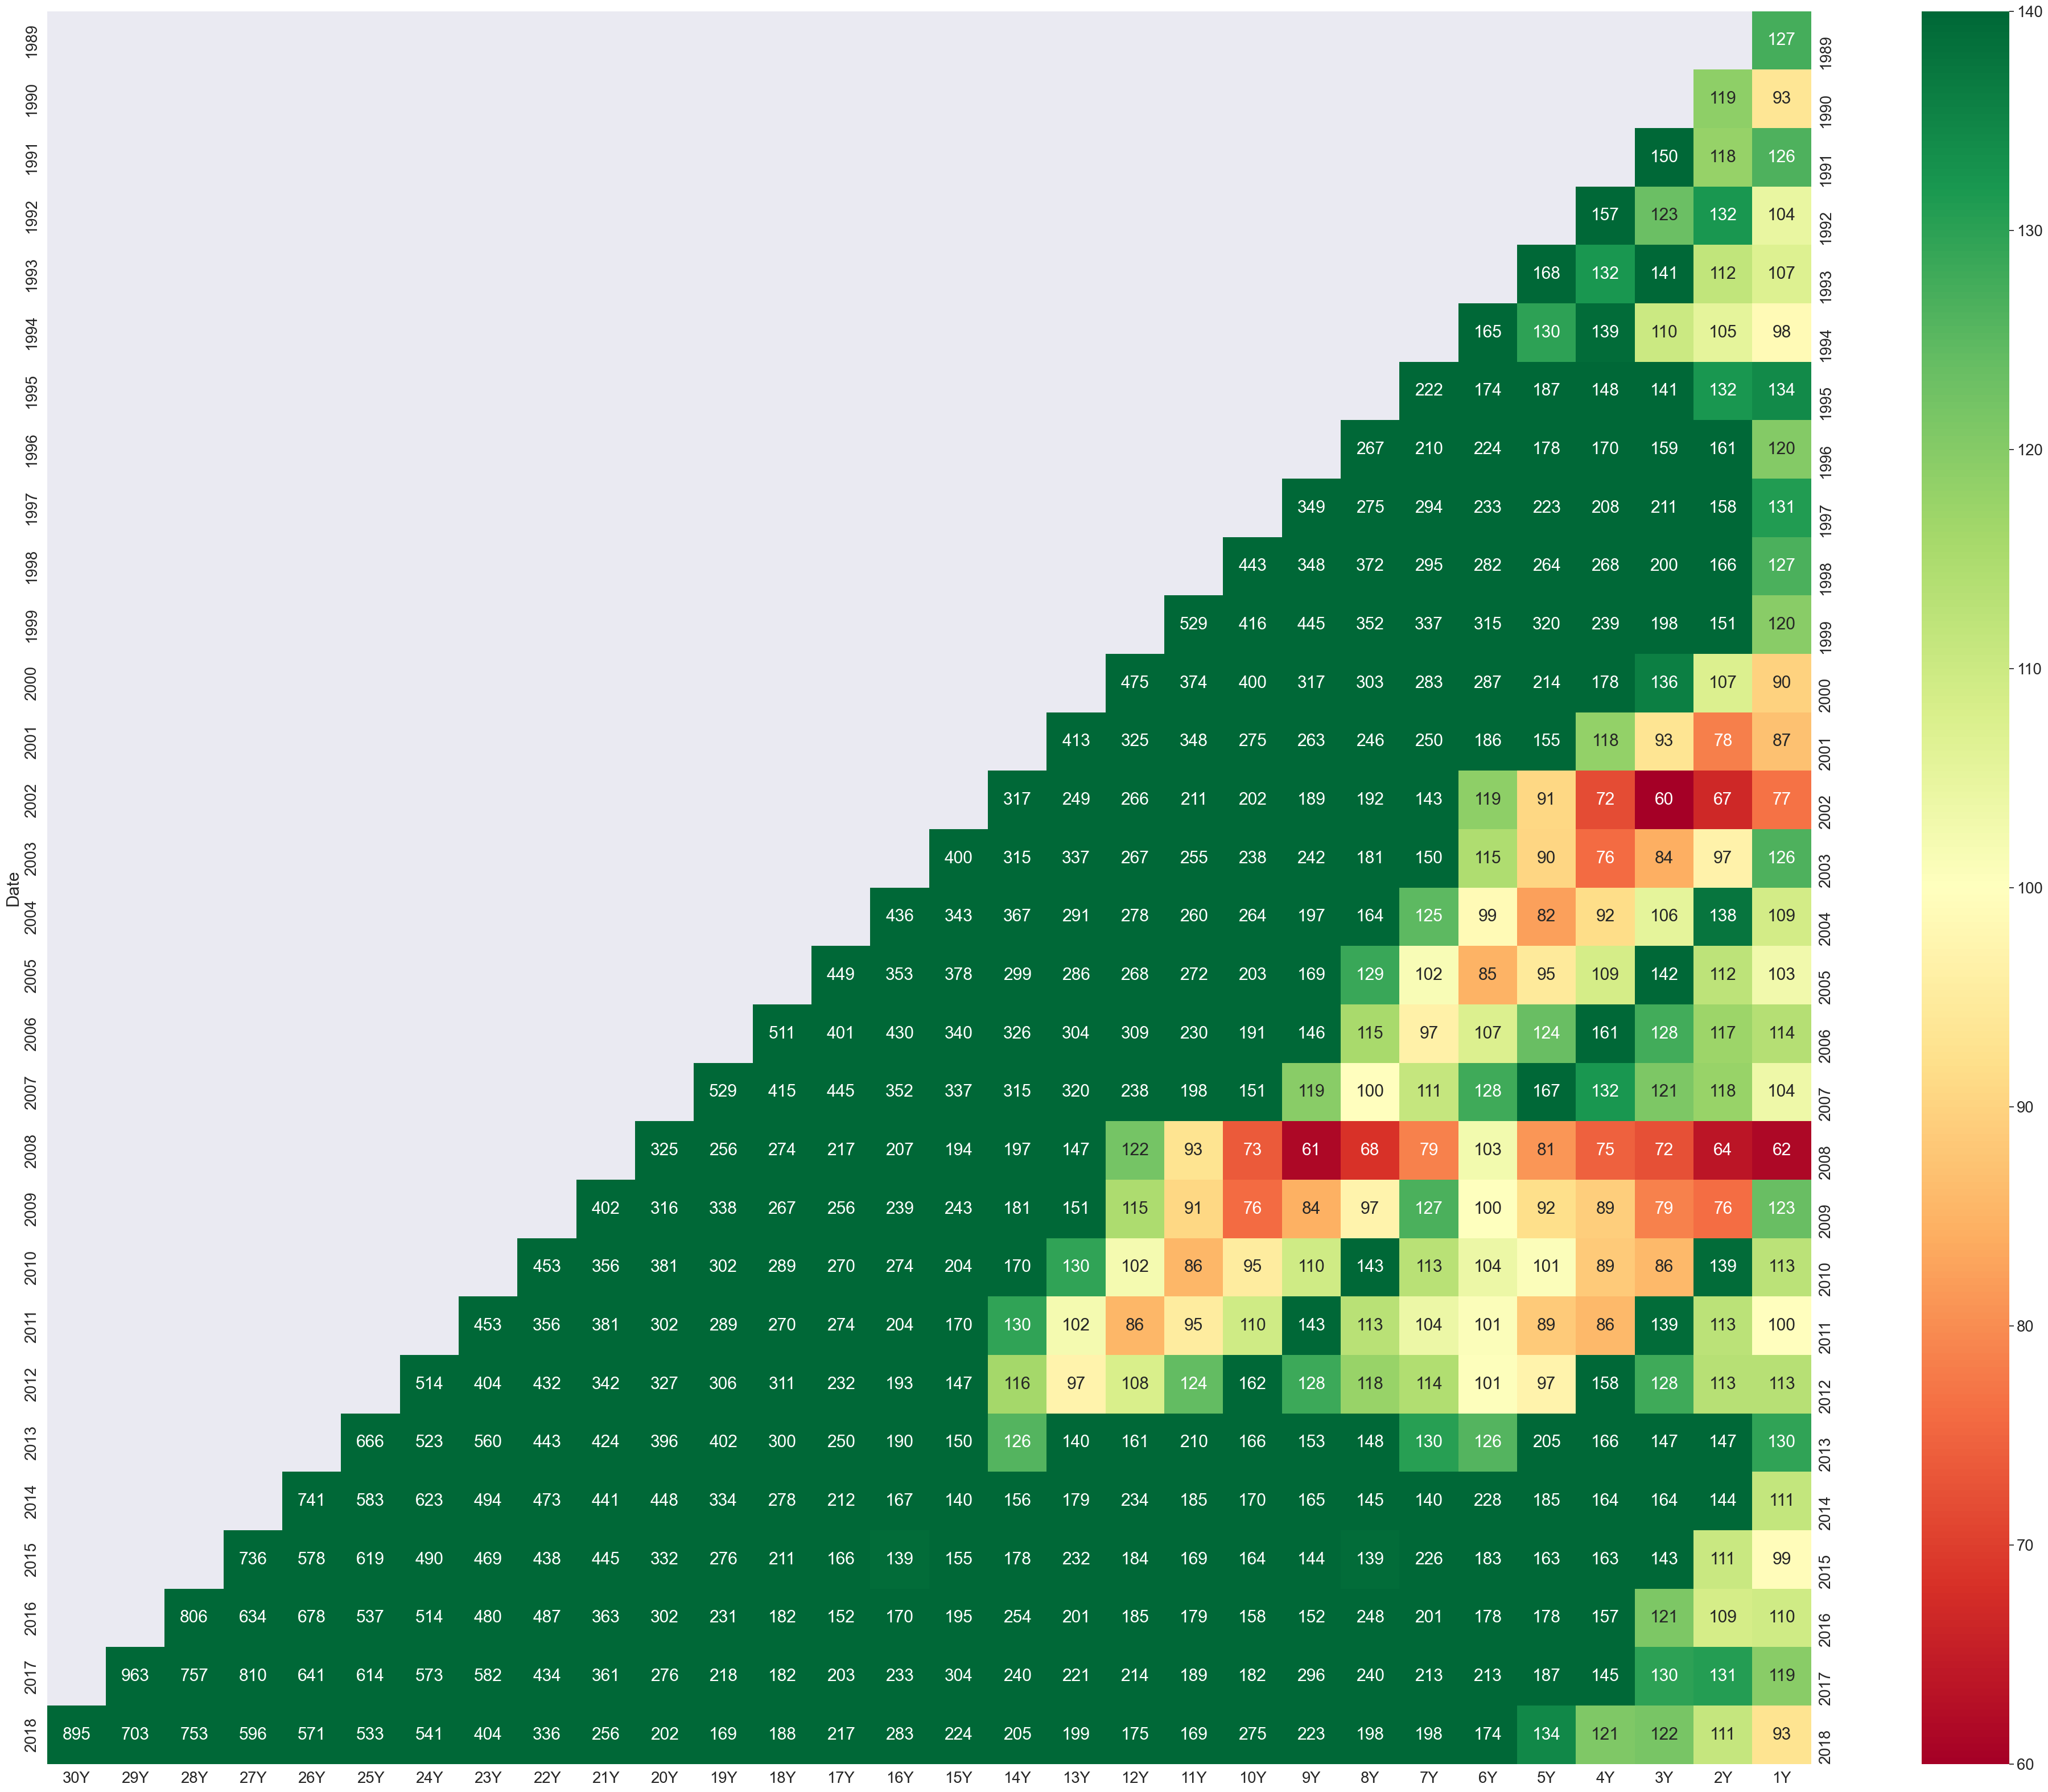

In [50]:
plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
sns.heatmap(triangle,fmt='.0f',annot=True, cmap='RdYlGn',
            vmin= 60,vmax=140, center=100)
plt.tick_params(axis='y',labelright=True)
plt.show()

The dollar triangle shows us how much money we would have if we had invested in the SP500 index. For example, if we invested 100 dollars at the beginning of 2010, we would have $223 by the end of 2018. A longer investment horizon increases the likelihood of a positive return. The red squares represent great losses, and the green means significant gains. 